In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

In [2]:
abc_call = pd.read_csv('./Call_Volume_Trend_Analysis_Project_9.xlsx - Call_Data.csv')

In [3]:
abc_call.head()

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration
0,Executives 42,1000042.0,98502XXXXX,2,1/1/2022,9.0,9_10,0:01:36,96.0,answered,Agent,YES,0:00:16
1,Executives 4,1000004.0,80595XXXXX,0,1/1/2022,9.0,9_10,0:02:20,140.0,answered,Agent,YES,0:00:26
2,Executives 65,1000065.0,70202XXXXX,0,1/1/2022,9.0,9_10,0:01:25,85.0,answered,AutoWrapped,YES,0:00:16
3,Executives 55,1000055.0,96104XXXXX,1,1/1/2022,9.0,9_10,0:01:31,91.0,answered,Agent,YES,0:00:25
4,Executives 21,1000021.0,82001XXXXX,0,1/1/2022,9.0,9_10,0:02:45,165.0,answered,Agent,YES,0:00:23


In [4]:
abc_call.shape

(117988, 13)

In [5]:
abc_call.dtypes

Agent_Name             object
Agent_ID              float64
Customer_Phone_No      object
Queue_Time(Secs)        int64
Date_&_Time            object
Time                  float64
Time_Bucket            object
Duration(hh:mm:ss)     object
Call_Seconds (s)      float64
Call_Status            object
Wrapped _By            object
Ringing                object
IVR _Duration          object
dtype: object

In [6]:
abc_call.isnull().sum().sort_values(ascending = False)

Wrapped _By           47877
Agent_Name            34198
Agent_ID              34198
Customer_Phone_No         0
Queue_Time(Secs)          0
Date_&_Time               0
Time                      0
Time_Bucket               0
Duration(hh:mm:ss)        0
Call_Seconds (s)          0
Call_Status               0
Ringing                   0
IVR _Duration             0
dtype: int64

In [7]:
abc_call[abc_call.duplicated()]

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration
42,NaN,NaN,87782XXXXX,16,1/1/2022,9.0,9_10,0:00:00,0.0,abandon,NaN,YES,0:00:16
312,NaN,NaN,96336XXXXX,120,1/1/2022,9.0,9_10,0:00:00,0.0,abandon,NaN,YES,0:00:14
4397,NaN,NaN,78499XXXXX,120,1/1/2022,20.0,20_21,0:00:00,0.0,abandon,NaN,YES,0:00:17
4436,NaN,NaN,93589XXXXX,120,1/1/2022,20.0,20_21,0:00:00,0.0,abandon,NaN,YES,0:00:14
4507,NaN,NaN,91779XXXXX,120,1/1/2022,20.0,20_21,0:00:00,0.0,abandon,NaN,YES,0:00:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108162,NaN,NaN,99715XXXXX,120,1/21/2022,10.0,10_11,0:00:00,0.0,abandon,NaN,YES,0:00:14
108395,NaN,NaN,90004XXXXX,120,1/21/2022,10.0,10_11,0:00:00,0.0,abandon,NaN,YES,0:00:20
108513,NaN,NaN,84090XXXXX,120,1/21/2022,11.0,11_12,0:00:00,0.0,abandon,NaN,YES,0:00:15
108714,NaN,NaN,90099XXXXX,120,1/21/2022,11.0,11_12,0:00:00,0.0,abandon,NaN,YES,0:00:14


In [8]:
abc_call.drop_duplicates(inplace = True)

In [9]:
abc_call.shape

(117047, 13)

In [10]:
null_col = pd.DataFrame()
null_col['Null'] = abc_call.isnull().sum().sort_values(ascending = False)
null_col = null_col[null_col['Null'] > 0]
null_col

,Null
Wrapped _By,46936
Agent_Name,33257
Agent_ID,33257


In [11]:
abc_call[abc_call['Agent_Name'].isna()]['Agent_ID'].unique()

array([nan])

In [12]:
abc_call[abc_call['Agent_ID'].isna()]['Agent_Name'].unique()

array([nan], dtype=object)

In [13]:
abc_call[abc_call['Agent_ID'].isna()]['Wrapped _By'].unique()

array([nan], dtype=object)

In [14]:
abc_call[abc_call['Agent_ID'].isna()]['Call_Status'].unique()

array(['abandon'], dtype=object)

In [15]:
abc_call[abc_call['Wrapped _By'].isna()]['Call_Status'].unique()

array(['abandon', 'answered', 'transfer'], dtype=object)

In [16]:
abc_call['Wrapped _By'].value_counts()

Agent          60396
AutoWrapped     9715
Name: Wrapped _By, dtype: int64

In [17]:
abc_call[(abc_call['Wrapped _By'].isna()) & ((abc_call['Call_Status'] == 'answered') | 
                                             (abc_call['Call_Status'] == 'transfer'))].fillna("Agent", inplace = True)

In [18]:
abc_call.fillna('Not Available', inplace=True)

In [19]:
abc_call.isna().sum().sort_values(ascending = False)

Agent_Name            0
Agent_ID              0
Customer_Phone_No     0
Queue_Time(Secs)      0
Date_&_Time           0
Time                  0
Time_Bucket           0
Duration(hh:mm:ss)    0
Call_Seconds (s)      0
Call_Status           0
Wrapped _By           0
Ringing               0
IVR _Duration         0
dtype: int64

In [20]:
obj_col = list(abc_call.dtypes[abc_call.dtypes == 'object'].index)
print(obj_col)

for col in obj_col:
    print(col, '\n', abc_call[col].unique())

# Assuming abc_call is a DataFrame, you may want to replace 'df' with 'abc_call' in the remaining code
for col in [obj_col[2], obj_col[3], obj_col[4], obj_col[6], obj_col[7], obj_col[8]]:
    print(col, '\n', abc_call[col].unique())

print(obj_col[5], '(Hour)', '\n', np.sort(pd.Series(abc_call[obj_col[5]].unique()).str.split(':').apply(lambda x: x[0]).unique()))
print(obj_col[5], '(Minute)', '\n', np.sort(pd.Series(abc_call[obj_col[5]].unique()).str.split(':').apply(lambda x: x[1]).unique()))
print(obj_col[5], '(Second)', '\n', np.sort(pd.Series(abc_call[obj_col[5]].unique()).str.split(':').apply(lambda x: x[2]).unique()))

print(obj_col[9], '(Hour)','\n', np.sort(pd.Series(abc_call[obj_col[9]].unique()).str.split(':').apply(lambda x : x[0]).unique()))
print(obj_col[9], '(Minute)', '\n', np.sort(pd.Series(abc_call[obj_col[9]].unique()).str.split(':').apply(lambda x: x[1]).unique()))
print(obj_col[9], '(Second)', '\n', np.sort(pd.Series(abc_call[obj_col[9]].unique()).str.split(':').apply(lambda x: x[2]).unique()))


['Agent_Name', 'Agent_ID', 'Customer_Phone_No', 'Date_&_Time', 'Time_Bucket', 'Duration(hh:mm:ss)', 'Call_Status', 'Wrapped _By', 'Ringing', 'IVR _Duration']
Agent_Name 
 ['Executives 42' 'Executives 4' 'Executives 65' 'Executives 55'
 'Executives 21' 'Not Available' 'Executives 49' 'Executives 50'
 'Executives 59' 'Executives 16' 'Executives 60' 'Executives 6'
 'Executives 51' 'Executives 40' 'Executives 54' 'Executives 41'
 'Executives 15' 'Executives 10' 'Executives 31' 'Executives 46'
 'Executives 22' 'Executives 26' 'Executives 53' 'Executives 23'
 'Executives 47' 'Executives 37' 'Executives 58' 'Executives 24'
 'Executives 38' 'Executives 18' 'Executives 48' 'Executives 9'
 'Executives 30' 'Executives 7' 'Executives 39' 'Executives 13'
 'Executives 62' 'Executives 19' 'Executives 35' 'Executives 25'
 'Executives 29' 'Executives 14' 'Executives 34' 'Executives 33'
 'Executives 43' 'Executives 1' 'Executives 27' 'Executives 12'
 'Executives 28' 'Executives 52' 'Executives 36' 'Exec

In [21]:
print(obj_col[2], '\n', abc_call[obj_col[2]].apply(lambda x: len(x)).unique())

Customer_Phone_No 
 [10  5]


In [22]:
abc_call[abc_call[obj_col[2]].apply(lambda x: len(x))==5]

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration
104000,Not Available,Not Available,XXXXX,120,1/20/2022,10.0,10_11,0:00:00,0.0,abandon,Not Available,YES,0:00:15


In [23]:
abc_call[obj_col[2]].loc[104000] = 'XXXXXXXXXX'

In [24]:
num_col = abc_call.select_dtypes(exclude = 'object')
num_col.head()

,Queue_Time(Secs),Time,Call_Seconds (s)
0,2,9.0,96.0
1,0,9.0,140.0
2,0,9.0,85.0
3,1,9.0,91.0
4,0,9.0,165.0


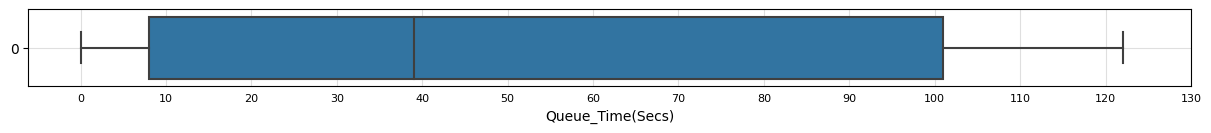

In [25]:
figure, axs = plt.subplots(1,1, figsize = (15,1))
sns.boxplot(num_col['Queue_Time(Secs)'], orient = 'h', ax = axs)
axs.set_xticks(np.arange(0, 140, 10))
axs.tick_params(axis='x', pad=5, length=0, labelsize=8)
axs.set_xlabel('Queue_Time(Secs)')
axs.grid(axis='y', alpha=0.4)
axs.grid(axis='x', alpha=0.4)
axs.set_axisbelow(True)
plt.show()

In [26]:
print(num_col.columns[1], num_col['Time'].unique())

Time [ 9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21.]


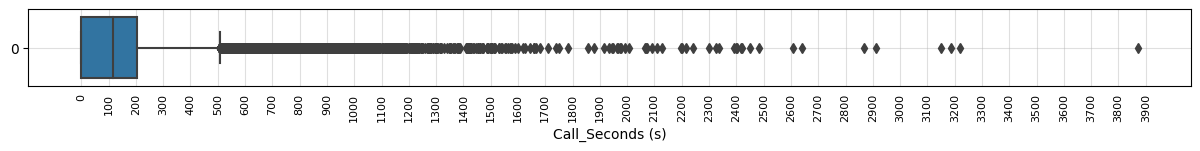

In [27]:
figure,axs = plt.subplots(1,1, figsize=(15,1))
sns.boxplot(num_col['Call_Seconds (s)'], orient='h', ax=axs)
axs.set_xticks(np.arange(0, 4000, 100))
axs.tick_params(axis='x', pad=5, length=0, labelsize=8, rotation=90)
axs.set_xlabel(num_col.columns[2])
axs.grid(axis='y', alpha=0.4)
axs.grid(axis='x', alpha=0.4)
axs.set_axisbelow(True)
plt.show()

In [28]:
abc_call[abc_call['Call_Seconds (s)'] > 3000]

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration
49457,Executives 10,1000010.0,79084XXXXX,4,1/11/2022,17.0,17_18,1:04:32,3872.0,answered,Agent,YES,0:00:24
49844,Executives 43,1000043.0,98961XXXXX,13,1/11/2022,18.0,18_19,0:52:29,3149.0,answered,Agent,YES,0:00:14
52597,Executives 5,1000005.0,98800XXXXX,24,1/12/2022,13.0,13_14,0:53:05,3185.0,answered,Agent,YES,0:00:13
91887,Executives 39,1000039.0,97648XXXXX,108,1/17/2022,18.0,18_19,0:53:39,3219.0,answered,AutoWrapped,YES,0:00:24


In [29]:
dur_sec = pd.Series(abc_call['Duration(hh:mm:ss)']).str.split(':').apply(lambda x: sum([a*b for a,b in zip([3600,60,1], map(int, x))]))
call_sec = abc_call['Call_Seconds (s)']

In [30]:
abc_call[(dur_sec - call_sec) != 0.0 ]

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration


In [31]:
abc_call['Call_Status'].unique()

array(['answered', 'abandon', 'transfer'], dtype=object)

In [32]:
abc_call[abc_call['Call_Status'] == 'abandon']['Call_Seconds (s)'].unique()

array([0.])

In [33]:
abc_call[abc_call['Call_Status'] == 'abandon']['Wrapped _By'].unique()

array(['Not Available'], dtype=object)

In [34]:
group = abc_call.groupby('Agent_ID')['Call_Status'].value_counts().unstack().reset_index()
group.fillna(0, inplace = True)
group['received'] = group['answered'] + group['transfer']
group.drop(['answered', 'transfer'], axis = 1, inplace = True)
group = group[group['received'] == 0.0]
group

Call_Status,Agent_ID,abandon,received
1,1000002.0,1.0,0.0
10,1000011.0,1.0,0.0
13,1000014.0,1.0,0.0
43,1000044.0,1.0,0.0
44,1000045.0,1.0,0.0
56,1000057.0,1.0,0.0
63,1000064.0,1.0,0.0
65,Not Available,33257.0,0.0


In [35]:
ag_id = list(group['Agent_ID'].values[:-1])
ag_nm = [abc_call[abc_call['Agent_ID'] == i] ['Agent_Name'].values[0] for i in ag_id]
abc_call['Agent_ID'].replace(ag_id, 'Not Available', inplace = True)
abc_call['Agent_Name'].replace(ag_nm, "Not Available", inplace = True)

In [36]:
abc_call.head()

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration
0,Executives 42,1000042.0,98502XXXXX,2,1/1/2022,9.0,9_10,0:01:36,96.0,answered,Agent,YES,0:00:16
1,Executives 4,1000004.0,80595XXXXX,0,1/1/2022,9.0,9_10,0:02:20,140.0,answered,Agent,YES,0:00:26
2,Executives 65,1000065.0,70202XXXXX,0,1/1/2022,9.0,9_10,0:01:25,85.0,answered,AutoWrapped,YES,0:00:16
3,Executives 55,1000055.0,96104XXXXX,1,1/1/2022,9.0,9_10,0:01:31,91.0,answered,Agent,YES,0:00:25
4,Executives 21,1000021.0,82001XXXXX,0,1/1/2022,9.0,9_10,0:02:45,165.0,answered,Agent,YES,0:00:23


In [47]:
abc_call['Date_&_Time'] = pd.to_datetime(abc_call['Date_&_Time'])

In [48]:
abc_call.dtypes

Agent_Name                    object
Agent_ID                      object
Customer_Phone_No             object
Queue_Time(Secs)               int64
Date_&_Time           datetime64[ns]
Time                         float64
Time_Bucket                   object
Duration(hh:mm:ss)            object
Call_Seconds (s)             float64
Call_Status                   object
Wrapped _By                   object
Ringing                       object
IVR _Duration                 object
dtype: object

In [49]:
abc_call

,Agent_Name,Agent_ID,Customer_Phone_No,Queue_Time(Secs),Date_&_Time,Time,Time_Bucket,Duration(hh:mm:ss),Call_Seconds (s),Call_Status,Wrapped _By,Ringing,IVR _Duration
0,Executives 42,1000042.0,98502XXXXX,2,2022-01-01,9.0,9_10,0:01:36,96.0,answered,Agent,YES,0:00:16
1,Executives 4,1000004.0,80595XXXXX,0,2022-01-01,9.0,9_10,0:02:20,140.0,answered,Agent,YES,0:00:26
2,Executives 65,1000065.0,70202XXXXX,0,2022-01-01,9.0,9_10,0:01:25,85.0,answered,AutoWrapped,YES,0:00:16
3,Executives 55,1000055.0,96104XXXXX,1,2022-01-01,9.0,9_10,0:01:31,91.0,answered,Agent,YES,0:00:25
4,Executives 21,1000021.0,82001XXXXX,0,2022-01-01,9.0,9_10,0:02:45,165.0,answered,Agent,YES,0:00:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117983,Executives 7,1000007.0,85399XXXXX,62,2022-01-23,20.0,20_21,0:01:32,92.0,answered,Agent,YES,0:00:42
117984,Executives 36,1000036.0,88397XXXXX,22,2022-01-23,20.0,20_21,0:01:14,74.0,answered,Agent,YES,0:00:15
117985,Executives 48,1000048.0,70035XXXXX,14,2022-01-23,20.0,20_21,0:01:48,108.0,answered,Agent,YES,0:00:23
117986,Executives 33,1000033.0,87773XXXXX,26,2022-01-23,20.0,20_21,0:01:13,73.0,answered,Agent,YES,0:01:05


In [50]:
abc_call.to_excel("Clean_data_Abc_Call_Analysis.xlsx")